<a href="https://colab.research.google.com/github/dimitarpg13/algorithmic_coding/blob/main/algorithmic_coding/classifiers/cart/classification_tree/notebooks/iterative_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iterative Classification Tree (CART) - Testing & Visualization

This notebook demonstrates and tests the **iterative** implementation of a Classification and Regression Tree (CART) for classification tasks. Unlike the recursive version, this implementation uses explicit stack management.

## Contents
1. **Setup & Imports**
2. **Basic Classification Tests**
3. **Decision Boundary Visualization**
4. **XOR Problem (Non-Linear)**
5. **Multiclass Classification**
6. **Hyperparameter Tuning Analysis**
7. **Overfitting Demonstration**


In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


%cd /content/

repo_url = "https://github.com/dimitarpg13/algorithmic_coding.git"
target_dir = "algorithmic_coding"

if not os.path.exists(target_dir):
    !git clone {repo_url}
else:
    print(f"Directory '{target_dir}' already exists. Skipping clone.")


%cd algorithmic_coding/

repo_dir = os.getcwd()

# Add the directory to the Python path
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from algorithmic_coding.classifiers.cart.classification_tree.recursive_implementation import ClassificationTree

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'DejaVu Sans'

# Color palettes - vibrant colors for clear visualization
COLORS_LIGHT = ['#FFB3BA', '#BAFFC9', '#BAE1FF', '#FFFFBA']
COLORS_DARK = ['#E74C3C', '#27AE60', '#3498DB', '#F39C12']

print("✓ Setup complete!")
print(f"Using ClassificationTree from iterative_implementation module")


/content
Directory 'algorithmic_coding' already exists. Skipping clone.
/content/algorithmic_coding
✓ Setup complete!
Using ClassificationTree from iterative_implementation module


---
## 1. Basic Classification Tests

Let's verify the iterative classifier works correctly on simple datasets.


In [3]:
# Test 1: Simple linearly separable data
print("Test 1: Linearly Separable Binary Classification")
print("=" * 55)

X_simple = np.array([
    [1, 2], [2, 3], [3, 1], [4, 2],  # Class 0 (bottom-left cluster)
    [6, 7], [7, 8], [8, 6], [9, 7]   # Class 1 (top-right cluster)
])
y_simple = np.array([0, 0, 0, 0, 1, 1, 1, 1])

clf = ClassificationTree(max_depth=5)
clf.fit(X_simple, y_simple)

print(f"Training accuracy: {clf.score(X_simple, y_simple):.2%}")
print(f"Tree depth: {clf.get_depth()}")
print(f"Number of leaves: {clf.get_n_leaves()}")
print(f"\nPredictions: {clf.predict(X_simple)}")
print(f"True labels: {y_simple}")


Test 1: Linearly Separable Binary Classification
Training accuracy: 100.00%
Tree depth: 1
Number of leaves: 2

Predictions: [0 0 0 0 1 1 1 1]
True labels: [0 0 0 0 1 1 1 1]


In [4]:
# Test 2: Probability predictions
print("Test 2: Probability Predictions")
print("=" * 55)

proba = clf.predict_proba(X_simple)
print("Class probabilities:")
print(f"  Sample 0 (class 0): P(0)={proba[0, 0]:.2f}, P(1)={proba[0, 1]:.2f}")
print(f"  Sample 4 (class 1): P(0)={proba[4, 0]:.2f}, P(1)={proba[4, 1]:.2f}")

# Verify probabilities sum to 1
print(f"\nAll probabilities sum to 1: {np.allclose(proba.sum(axis=1), 1)}")


Test 2: Probability Predictions
Class probabilities:
  Sample 0 (class 0): P(0)=1.00, P(1)=0.00
  Sample 4 (class 1): P(0)=0.00, P(1)=1.00

All probabilities sum to 1: True


---
## 2. Decision Boundary Visualization

Visualize how the tree partitions the feature space with axis-aligned splits.


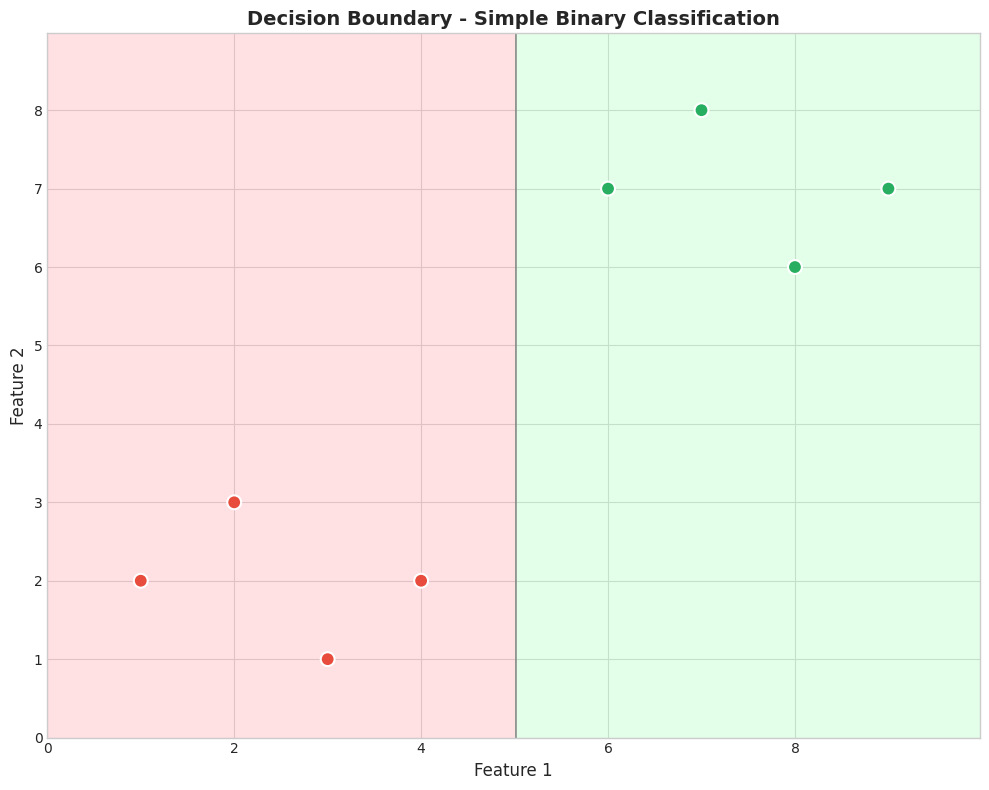

In [5]:
def plot_decision_boundary(clf, X, y, title="Decision Boundary", ax=None, show_misclassified=False):
    """
    Plot the decision boundary of a classifier along with data points.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    # Create mesh grid
    h = 0.02  # Step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Get number of classes
    n_classes = len(np.unique(y))
    cmap_light = ListedColormap(COLORS_LIGHT[:n_classes])
    cmap_dark = ListedColormap(COLORS_DARK[:n_classes])

    # Plot decision regions
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
    ax.contour(xx, yy, Z, colors='gray', linewidths=0.5, alpha=0.5)

    # Plot data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_dark,
                         edgecolors='white', s=100, linewidths=1.5)

    # Mark misclassified if requested
    if show_misclassified:
        y_pred = clf.predict(X)
        misclassified = y_pred != y
        if misclassified.any():
            ax.scatter(X[misclassified, 0], X[misclassified, 1],
                      facecolors='none', edgecolors='black', s=200, linewidths=2,
                      label=f'Misclassified ({misclassified.sum()})')
            ax.legend(loc='upper left')

    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')

    return ax

# Visualize simple classification
fig, ax = plt.subplots(figsize=(10, 8))
plot_decision_boundary(clf, X_simple, y_simple,
                      title="Decision Boundary - Simple Binary Classification", ax=ax)
plt.tight_layout()
plt.show()


### 2.1 Gaussian Clusters - Train/Test Split


In [6]:
# Generate Gaussian clusters
np.random.seed(42)

n_samples = 100
mean_0 = [2, 2]
mean_1 = [6, 6]
cov = [[1, 0.5], [0.5, 1]]

X_0 = np.random.multivariate_normal(mean_0, cov, n_samples)
X_1 = np.random.multivariate_normal(mean_1, cov, n_samples)

X_gauss = np.vstack([X_0, X_1])
y_gauss = np.array([0] * n_samples + [1] * n_samples)

# Shuffle data
shuffle_idx = np.random.permutation(len(y_gauss))
X_gauss = X_gauss[shuffle_idx]
y_gauss = y_gauss[shuffle_idx]

# Split train/test (80/20)
split = int(0.8 * len(y_gauss))
X_train, X_test = X_gauss[:split], X_gauss[split:]
y_train, y_test = y_gauss[:split], y_gauss[split:]

# Fit classifier
clf_gauss = ClassificationTree(max_depth=5)
clf_gauss.fit(X_train, y_train)

print("Gaussian Clusters Dataset")
print("=" * 55)
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Training accuracy: {clf_gauss.score(X_train, y_train):.2%}")
print(f"Test accuracy: {clf_gauss.score(X_test, y_test):.2%}")
print(f"Tree depth: {clf_gauss.get_depth()}")
print(f"Number of leaves: {clf_gauss.get_n_leaves()}")


Gaussian Clusters Dataset
Training samples: 160
Test samples: 40
Training accuracy: 100.00%
Test accuracy: 97.50%
Tree depth: 3
Number of leaves: 4


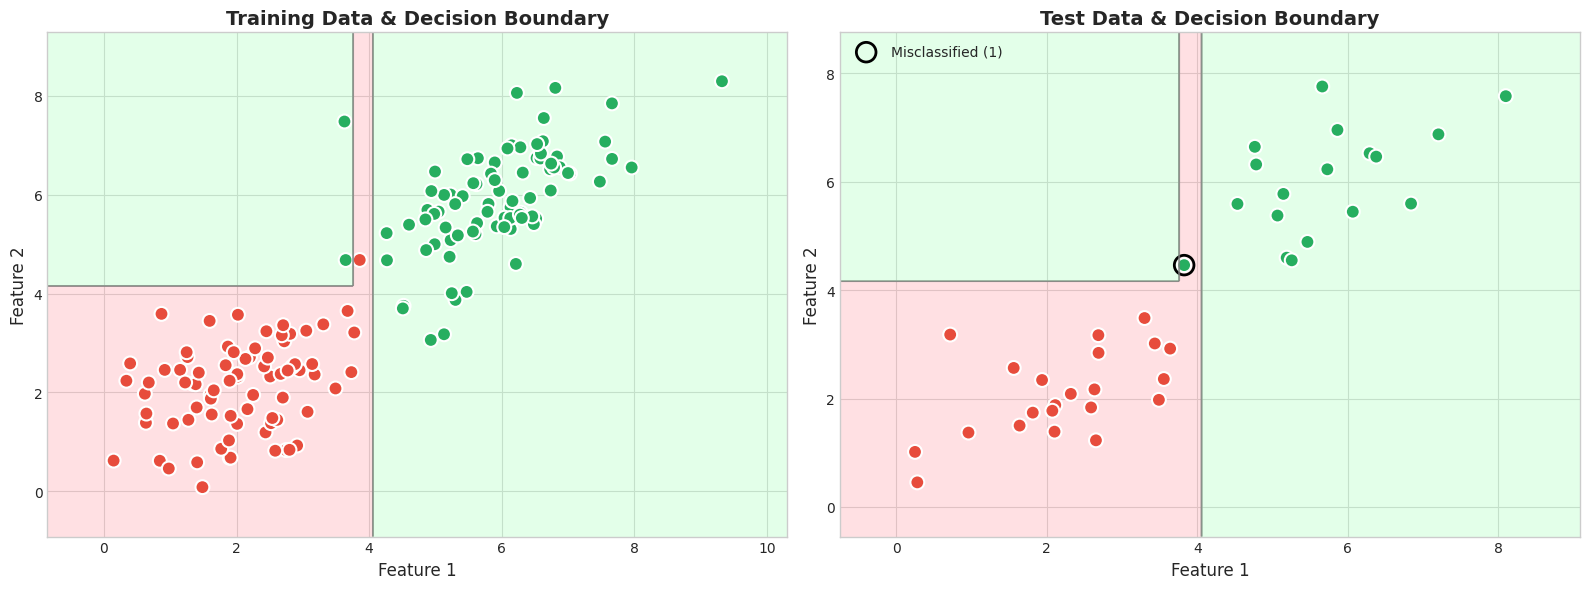

In [7]:
# Visualize Gaussian clusters - Training vs Test
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training data
plot_decision_boundary(clf_gauss, X_train, y_train,
                      title="Training Data & Decision Boundary", ax=axes[0])

# Test data with misclassified points highlighted
plot_decision_boundary(clf_gauss, X_test, y_test,
                      title="Test Data & Decision Boundary", ax=axes[1],
                      show_misclassified=True)

plt.tight_layout()
plt.show()


---
## 3. XOR Problem (Non-Linear Decision Boundary)

The XOR problem requires multiple splits and demonstrates that decision trees can learn non-linear boundaries.


In [8]:
# Generate XOR pattern
np.random.seed(42)
n_per_corner = 40
noise = 0.3

# Four corners: (0,0)->0, (0,3)->1, (3,0)->1, (3,3)->0
corners = [(0, 0, 0), (0, 3, 1), (3, 0, 1), (3, 3, 0)]
X_xor_list = []
y_xor_list = []

for cx, cy, label in corners:
    X_corner = np.random.randn(n_per_corner, 2) * noise + np.array([cx, cy])
    X_xor_list.append(X_corner)
    y_xor_list.extend([label] * n_per_corner)

X_xor = np.vstack(X_xor_list)
y_xor = np.array(y_xor_list)

# Fit classifier
clf_xor = ClassificationTree(max_depth=6)
clf_xor.fit(X_xor, y_xor)

print("XOR Problem Dataset")
print("=" * 55)
print(f"Total samples: {len(X_xor)}")
print(f"Training accuracy: {clf_xor.score(X_xor, y_xor):.2%}")
print(f"Tree depth: {clf_xor.get_depth()}")
print(f"Number of leaves: {clf_xor.get_n_leaves()}")


XOR Problem Dataset
Total samples: 160
Training accuracy: 99.38%
Tree depth: 6
Number of leaves: 12


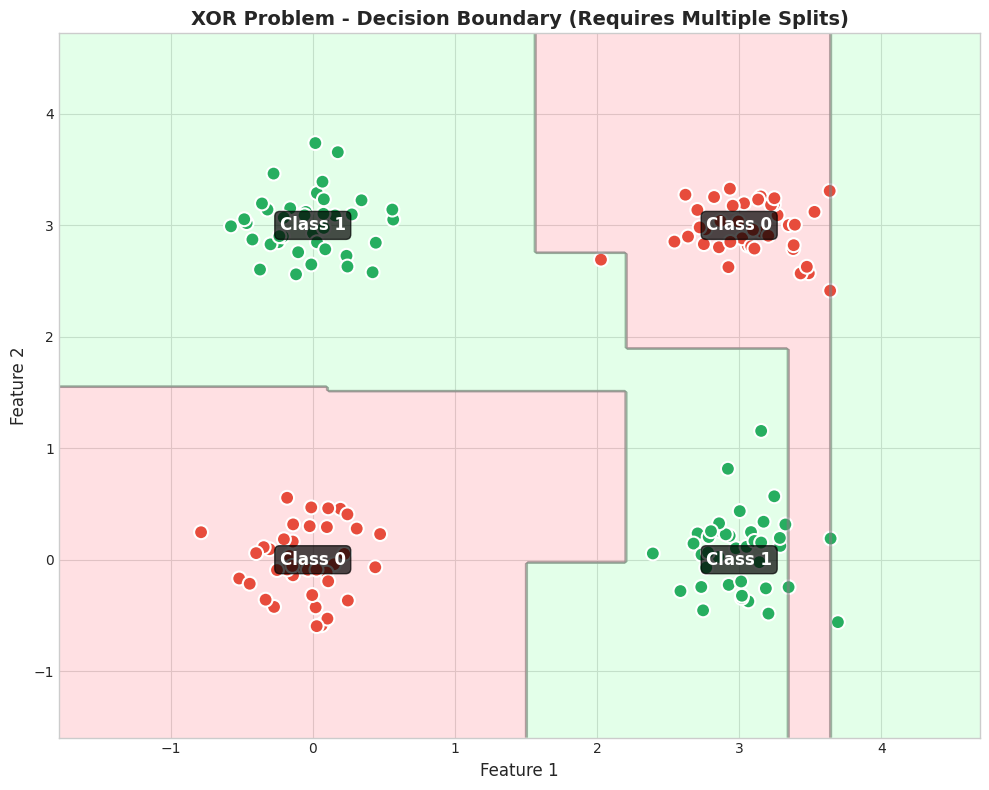

In [9]:
# Visualize XOR decision boundary
fig, ax = plt.subplots(figsize=(10, 8))
plot_decision_boundary(clf_xor, X_xor, y_xor,
                      title="XOR Problem - Decision Boundary (Requires Multiple Splits)", ax=ax)

# Add corner labels
for cx, cy, label in corners:
    ax.annotate(f'Class {label}', xy=(cx, cy), fontsize=12, fontweight='bold',
               ha='center', va='center', color='white',
               bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))

plt.tight_layout()
plt.show()


---
## 4. Multiclass Classification

Testing the classifier on a 3-class problem.


In [10]:
# Generate 3-class dataset
np.random.seed(123)

n_samples = 80
centers = [[1, 1], [5, 1], [3, 5]]

X_multi = []
y_multi = []

for i, center in enumerate(centers):
    X_class = np.random.randn(n_samples, 2) * 0.8 + np.array(center)
    X_multi.append(X_class)
    y_multi.extend([i] * n_samples)

X_multi = np.vstack(X_multi)
y_multi = np.array(y_multi)

# Shuffle
shuffle_idx = np.random.permutation(len(y_multi))
X_multi = X_multi[shuffle_idx]
y_multi = y_multi[shuffle_idx]

# Split
split = int(0.8 * len(y_multi))
X_train_m, X_test_m = X_multi[:split], X_multi[split:]
y_train_m, y_test_m = y_multi[:split], y_multi[split:]

# Fit classifier
clf_multi = ClassificationTree(max_depth=6)
clf_multi.fit(X_train_m, y_train_m)

print("Multiclass Classification (3 Classes)")
print("=" * 55)
print(f"Training samples: {len(X_train_m)}")
print(f"Test samples: {len(X_test_m)}")
print(f"Number of classes: {clf_multi.n_classes_}")
print(f"Training accuracy: {clf_multi.score(X_train_m, y_train_m):.2%}")
print(f"Test accuracy: {clf_multi.score(X_test_m, y_test_m):.2%}")
print(f"Tree depth: {clf_multi.get_depth()}")
print(f"Number of leaves: {clf_multi.get_n_leaves()}")


Multiclass Classification (3 Classes)
Training samples: 192
Test samples: 48
Number of classes: 3
Training accuracy: 100.00%
Test accuracy: 97.92%
Tree depth: 2
Number of leaves: 3


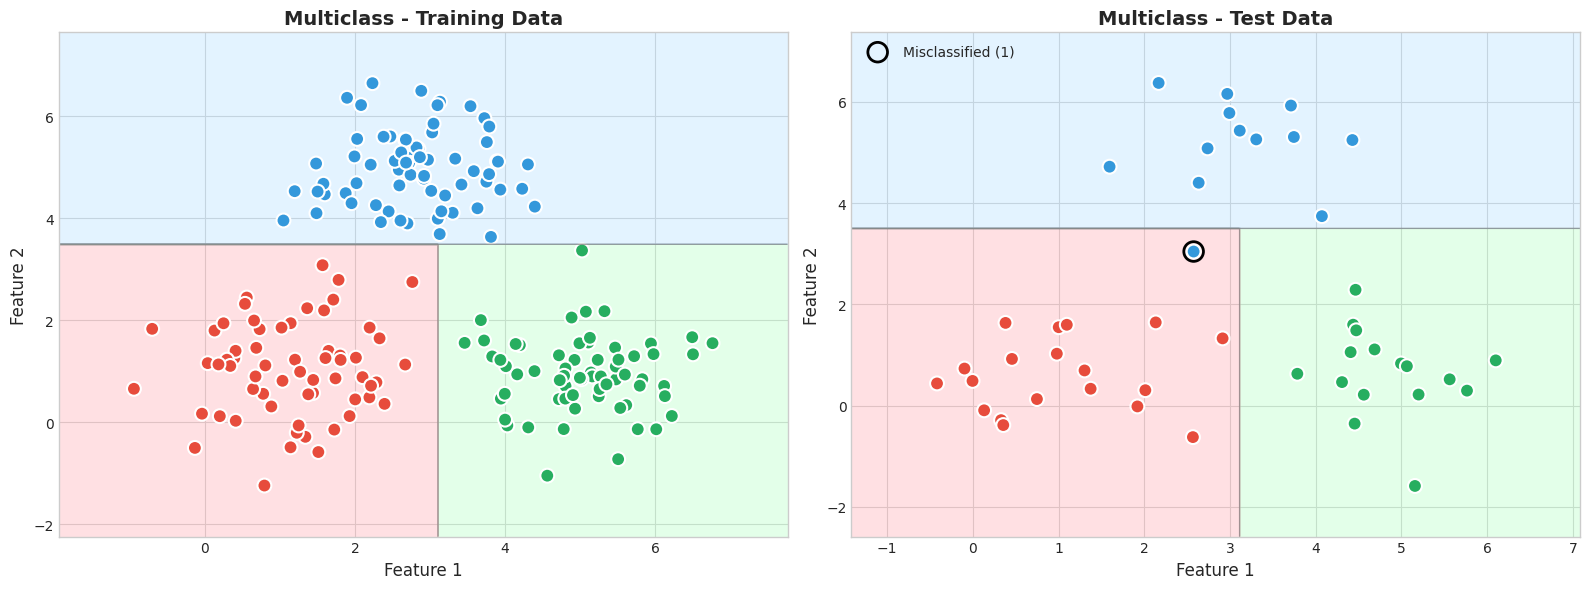

In [11]:
# Visualize multiclass classification
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_decision_boundary(clf_multi, X_train_m, y_train_m,
                      title="Multiclass - Training Data", ax=axes[0])
plot_decision_boundary(clf_multi, X_test_m, y_test_m,
                      title="Multiclass - Test Data", ax=axes[1],
                      show_misclassified=True)

plt.tight_layout()
plt.show()


---
## 5. Hyperparameter Tuning Analysis

Analyze how `max_depth` affects model performance and complexity.


In [12]:
# Generate complex dataset for hyperparameter analysis
np.random.seed(42)

n_samples = 300
X_complex = np.random.randn(n_samples, 2) * 2
# Create circular decision boundary
y_complex = ((X_complex[:, 0] ** 2 + X_complex[:, 1] ** 2) > 2).astype(int)
# Add label noise (5%)
noise_idx = np.random.choice(n_samples, size=int(0.05 * n_samples), replace=False)
y_complex[noise_idx] = 1 - y_complex[noise_idx]

# Split
split = int(0.7 * n_samples)
X_train_c, X_test_c = X_complex[:split], X_complex[split:]
y_train_c, y_test_c = y_complex[:split], y_complex[split:]

# Test different max_depth values
depths = range(1, 15)
train_accs = []
test_accs = []
n_leaves_list = []

for depth in depths:
    clf_d = ClassificationTree(max_depth=depth)
    clf_d.fit(X_train_c, y_train_c)

    train_accs.append(clf_d.score(X_train_c, y_train_c))
    test_accs.append(clf_d.score(X_test_c, y_test_c))
    n_leaves_list.append(clf_d.get_n_leaves())

print("Hyperparameter Analysis Complete!")
print(f"Dataset: Circular decision boundary with 5% label noise")
print(f"Training samples: {len(X_train_c)}, Test samples: {len(X_test_c)}")


Hyperparameter Analysis Complete!
Dataset: Circular decision boundary with 5% label noise
Training samples: 210, Test samples: 90


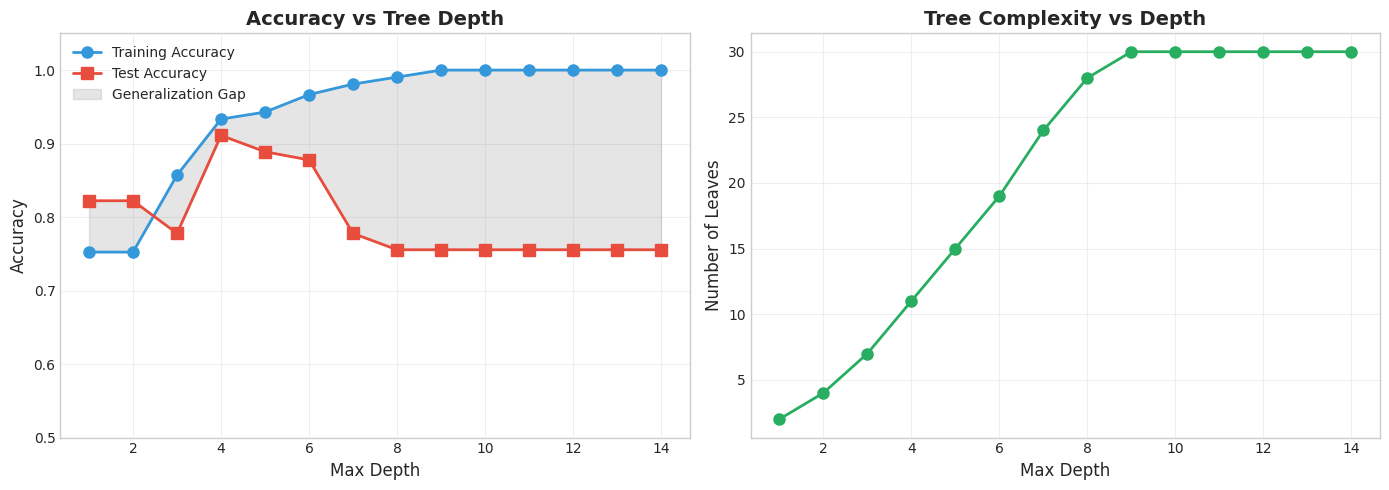


Best max_depth: 4
  Training accuracy: 93.33%
  Test accuracy: 91.11%
  Number of leaves: 11


In [13]:
# Plot hyperparameter analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy vs Depth
axes[0].plot(list(depths), train_accs, 'o-', color='#3498DB', linewidth=2,
             markersize=8, label='Training Accuracy')
axes[0].plot(list(depths), test_accs, 's-', color='#E74C3C', linewidth=2,
             markersize=8, label='Test Accuracy')
axes[0].fill_between(list(depths), train_accs, test_accs, alpha=0.2, color='gray',
                     label='Generalization Gap')
axes[0].set_xlabel('Max Depth', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Accuracy vs Tree Depth', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].set_ylim(0.5, 1.05)
axes[0].grid(True, alpha=0.3)

# Complexity vs Depth
axes[1].plot(list(depths), n_leaves_list, 'o-', color='#27AE60', linewidth=2, markersize=8)
axes[1].set_xlabel('Max Depth', fontsize=12)
axes[1].set_ylabel('Number of Leaves', fontsize=12)
axes[1].set_title('Tree Complexity vs Depth', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find best depth
best_idx = np.argmax(test_accs)
print(f"\nBest max_depth: {list(depths)[best_idx]}")
print(f"  Training accuracy: {train_accs[best_idx]:.2%}")
print(f"  Test accuracy: {test_accs[best_idx]:.2%}")
print(f"  Number of leaves: {n_leaves_list[best_idx]}")


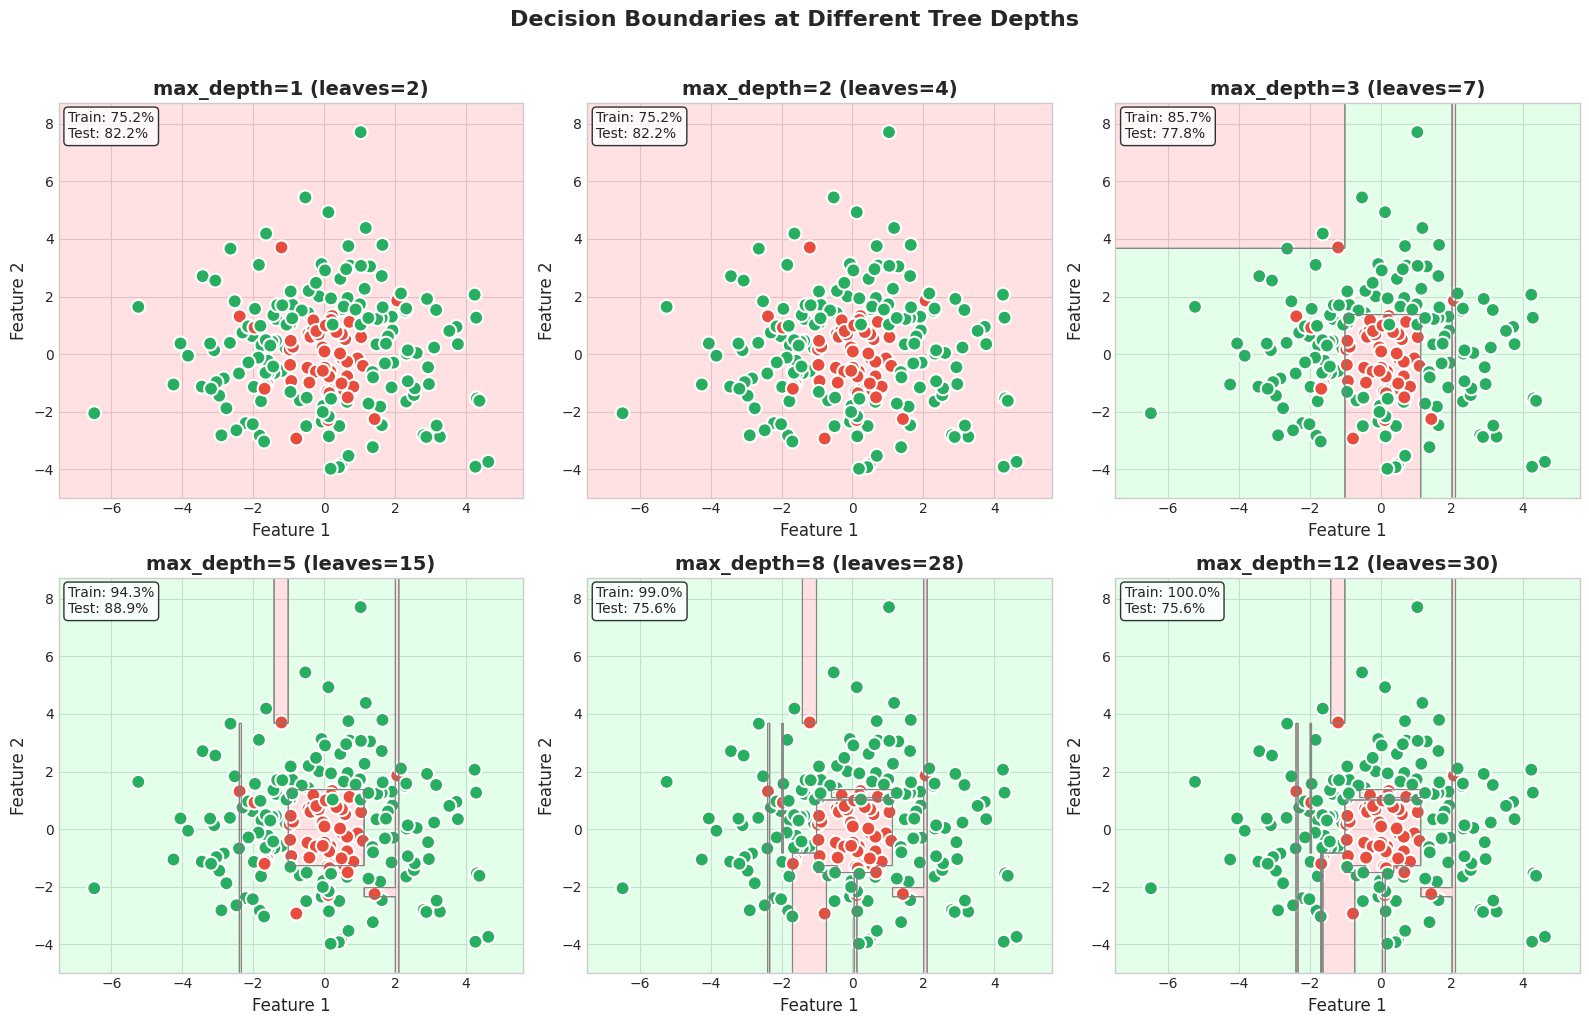

In [14]:
# Visualize decision boundaries at different depths
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

selected_depths = [1, 2, 3, 5, 8, 12]

for ax, depth in zip(axes, selected_depths):
    clf_viz = ClassificationTree(max_depth=depth)
    clf_viz.fit(X_train_c, y_train_c)

    plot_decision_boundary(clf_viz, X_train_c, y_train_c, ax=ax,
                          title=f"max_depth={depth} (leaves={clf_viz.get_n_leaves()})")

    # Add accuracy annotation
    test_acc = clf_viz.score(X_test_c, y_test_c)
    train_acc = clf_viz.score(X_train_c, y_train_c)
    ax.annotate(f'Train: {train_acc:.1%}\nTest: {test_acc:.1%}',
               xy=(0.02, 0.98), xycoords='axes fraction',
               fontsize=10, ha='left', va='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Decision Boundaries at Different Tree Depths', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


---
## 6. Overfitting Demonstration

Demonstrating how deep trees can overfit to training data.


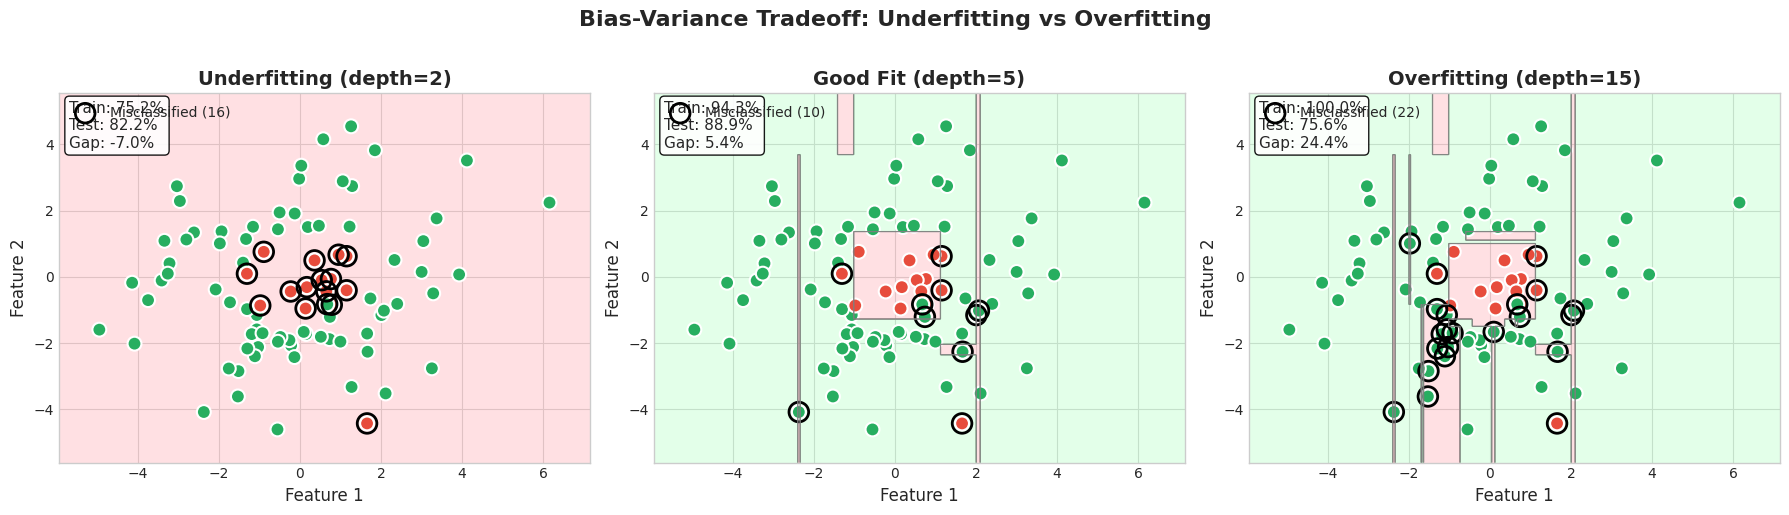

In [15]:
# Compare underfitting vs good fit vs overfitting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

configs = [
    (2, "Underfitting (depth=2)"),
    (5, "Good Fit (depth=5)"),
    (15, "Overfitting (depth=15)")
]

for ax, (depth, title) in zip(axes, configs):
    clf_of = ClassificationTree(max_depth=depth)
    clf_of.fit(X_train_c, y_train_c)

    plot_decision_boundary(clf_of, X_test_c, y_test_c, title=title, ax=ax,
                          show_misclassified=True)

    train_acc = clf_of.score(X_train_c, y_train_c)
    test_acc = clf_of.score(X_test_c, y_test_c)
    gap = train_acc - test_acc

    ax.annotate(f'Train: {train_acc:.1%}\nTest: {test_acc:.1%}\nGap: {gap:.1%}',
               xy=(0.02, 0.98), xycoords='axes fraction',
               fontsize=11, ha='left', va='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

plt.suptitle('Bias-Variance Tradeoff: Underfitting vs Overfitting',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


---
## Summary

This notebook demonstrated the **iterative** implementation of a Classification Tree (CART):

### Key Findings:

1. **Basic Classification** - The iterative CART correctly classifies linearly separable data with 100% accuracy

2. **Non-linear Boundaries** - The tree can learn complex decision boundaries (XOR problem) through multiple axis-aligned splits

3. **Multiclass Support** - Works seamlessly with 3+ classes

4. **Hyperparameter Tuning**:
   - `max_depth` controls the bias-variance tradeoff
   - Shallow trees → underfitting (high bias)
   - Deep trees → overfitting (high variance)
   - Optimal depth balances training and test accuracy

5. **Overfitting Prevention**:
   - Use `max_depth` to limit tree complexity
   - Use `min_samples_split` and `min_samples_leaf` for additional regularization

### Implementation Highlights:
- Uses **stack-based iteration** instead of recursion
- **Gini impurity** as the splitting criterion
- Supports probability predictions via `predict_proba()`
- Provides tree statistics: `get_depth()`, `get_n_leaves()`
